In [232]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import copy

In [197]:
# считайте подготовленный файл с помощью read_excel  (data_earth)

# https://ssd.jpl.nasa.gov/horizons.cgi#top

# Ephemeris Type [change] : 	VECTORS
# Target Body [change] : 	Earth [Geocenter] [399]
# Coordinate Origin [change] : 	Sun (body center) [500@10]
# Time Span [change] : 	Start=2020-01-30, Stop=2021-01-30, Step=1 d
# Table Settings [change] : 	quantities code=1; output units=KM-S; CSV format=YES
# Display/Output [change] : 	download/save (plain text file)

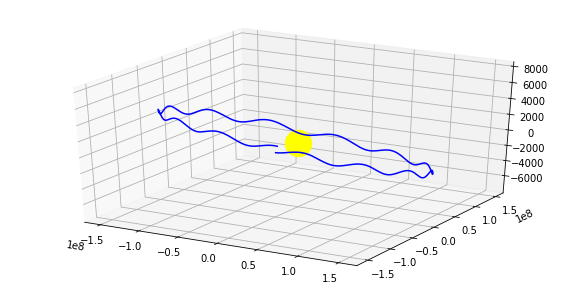

In [198]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
# нарисуйте пространственную траекторию с помощью plot3D
ax.scatter(0, 0, 0, color = 'yellow', s = 700)

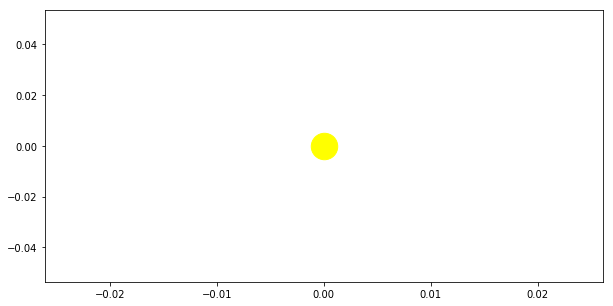

In [228]:
fig = plt.figure(figsize=(10,5))
# нарисуйте плоскую  траекторию с помощью scatter
plt.scatter(0, 0, color = 'yellow', s = 700)

In [200]:
# рассчитайте основные параметры для эллипса
# https://ru.wikipedia.org/wiki/Орбита_Земли#/media/Файл:Seasons1.svg
# a = 
# c = 
# b = 

In [201]:
# Для построения эллипса вспомним формулу x^2 / a^2 + y^2 / b^2 = 1
# учтите, что для построения нашего эллипса, нужно сдвинуть его вдоль оси Ox вправо,
# т.к. сейчас в начале координат находится Солнце, т.е. фокус.
y_kepler = b * (1 - ((data_earth[2].values - 548301)*(data_earth[2].values - 548301))/(a*a))**0.5

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


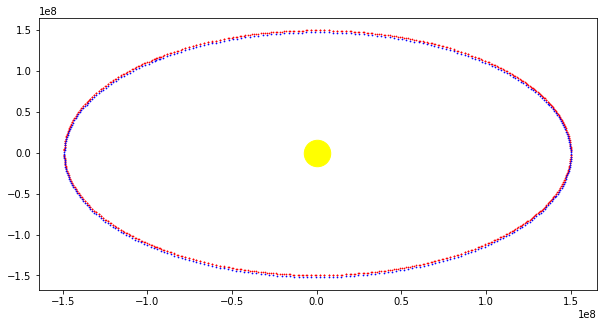

In [202]:
fig = plt.figure(figsize=(10,5))
# Нарисуйте на одном графике теоретические и фактические точки. Насколько они близки визуально?
plt.scatter(0, 0, color = 'yellow', s = 700)

In [229]:
error_list = list()
for i in range(len(data_earth[2].values)):
    if data_earth[3].values[i] >=0:
        error = abs((data_earth[3].values[i] - (b * (1 - ((data_earth[2].values[i] - 548301)*(data_earth[2].values[i] - 548301))/(a*a))**0.5))/data_earth[2].values[i])
    if data_earth[3].values[i] < 0:
        error = abs((data_earth[3].values[i] - (- b * (1 - ((data_earth[2].values[i] - 548301)*(data_earth[2].values[i] - 548301))/(a*a))**0.5))/data_earth[2].values[i])
    error_list.append(error)
error_list

In [ ]:
# попробуйте найти среднее значение. Почему возникает ошибка? Проверьте значения в списке

In [224]:
# Если Ваш список назывался error_list, то дальнейший код уберёт пустые значения и посчитает среднее
error_list = [x for x in error_list if str(x) != 'nan']
np.mean(error_list)

0.07812578462552837

In [230]:
# строим график для ошибок. Почему существуют огромные пиковые значения? На этот вопрос развёрнуто ответьте в отчёте.
plt.plot(error_list)